In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("simple_diab.csv", sep="\t")
data

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [7]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape

(746, 2)

In [13]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[120,   5],
       [ 11, 113]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)

0.9357429718875502

In [21]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9112903225806451

In [22]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9576271186440678


# Decision Boundary

In [25]:
x_min, x_max = X.values[:, 0].min() -1  ,  X.values[:, 0].max() +1
y_min, y_max = X.values[:, 1].min() -1   ,  X.values[:, 1].max() +1

In [26]:
xx,yy = np.meshgrid( np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1) )

In [32]:
Z = clf.predict( np.c_[xx.ravel(), yy.ravel()] )
Z = Z.reshape(xx.shape)

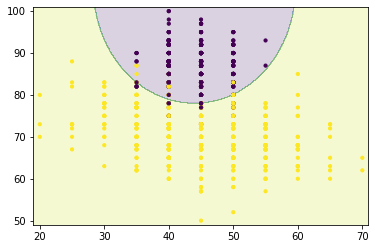

In [39]:
fig, ax = plt.subplots()
ax.contourf(xx,yy,Z, alpha=0.2)
ax.scatter(X.values[:,0], X.values[:,1], s=10, c=y)